In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to read data from a file
def read_data(file_path):
    alpha_data = {}
    with open(file_path, "r") as file:
        for line in file:
            match = re.match(r"(\d+)_(\d+\.\d+)_(\d+):(\d+)", line.strip())
            if match:
                alpha = float(match.group(2))
                steps = int(match.group(4))
                if alpha not in alpha_data:
                    alpha_data[alpha] = []
                alpha_data[alpha].append(steps)
    return alpha_data

# Function to compute mean and standard deviation for each alpha
def compute_stats(alpha_data):
    stats = {}
    for alpha, steps in alpha_data.items():
        stats[alpha] = {
            "mean": np.mean(steps),
            "std_dev": np.std(steps),
            "count": len(steps),
        }
    return stats

In [3]:
# Folder containing the results
RESULT_FOLDER = "sims"

# Bot file names and labels
bot_files = ["bot1.py", "bot1_m.py", "bot2.py", "bot2_m.py"]
labels = ["Bot 1 (Stationary Rat)", "Bot 1 (Moving Rat)", "Bot 2 (Stationary Rat)", "Bot 2 (Moving Rat)"]
colors = ["blue", "green", "red", "orange"]

# Data storage
bot_stats = []

# Read and compute stats for each bot
for bot_file in bot_files:
    file_path = os.path.join(RESULT_FOLDER, bot_file)
    if os.path.exists(file_path):
        alpha_data = read_data(file_path)
        bot_stats.append(compute_stats(alpha_data))
    else:
        print(f"File not found: {file_path}")

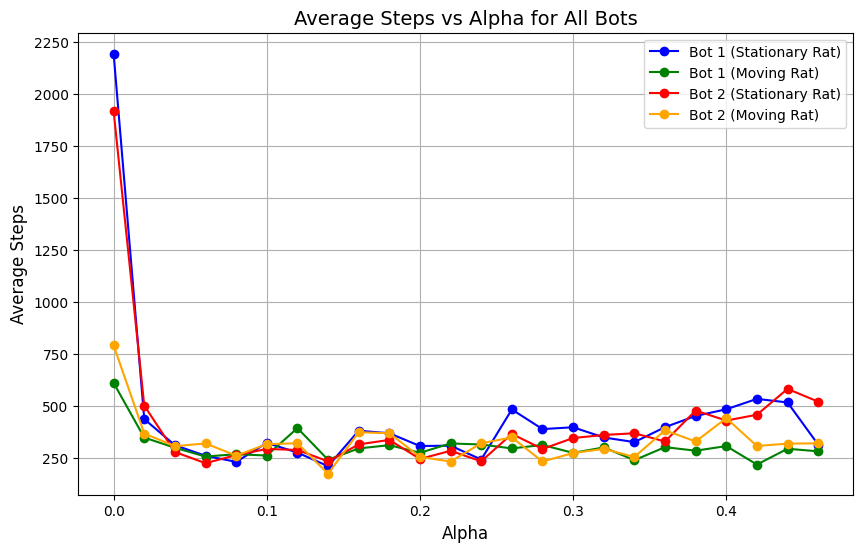

In [4]:
# Plot the graph comparing all bots
plt.figure(figsize=(10, 6))

for i, (stats, label, color) in enumerate(zip(bot_stats, labels, colors)):
    alphas = sorted(stats.keys())
    means = [stats[alpha]["mean"] for alpha in alphas]
    plt.plot(alphas, means, label=label, color=color, marker='o')

plt.title("Average Steps vs Alpha for All Bots", fontsize=14)
plt.xlabel("Alpha", fontsize=12)
plt.ylabel("Average Steps", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()